In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate dummy function

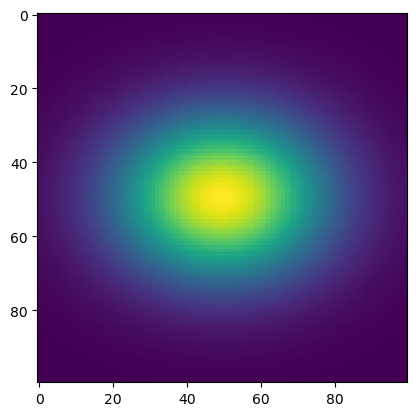

In [67]:
def f(a,b):
    return np.exp(-(0.7*(a-2.5))**2) * np.exp(-(0.9*(b-2.5))**2)

def g(a,b):
    return 10 - np.sqrt(a*a+b*b)

x1 = np.linspace(0, 5, 100)
x2 = np.linspace(0, 5, 100)

X, Y = np.meshgrid(x1, x2)
Z = f(X, Y)

plt.imshow(Z)

# Generate data according to the function

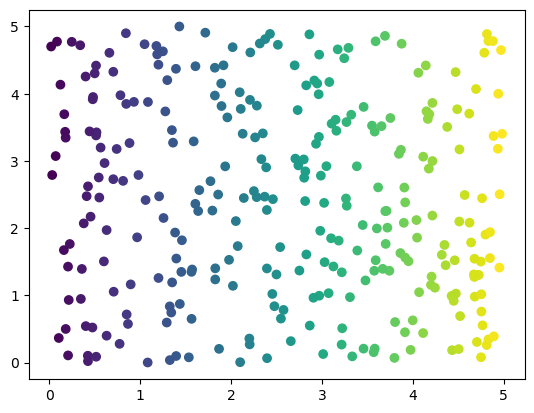

In [200]:
x1 = np.random.random(300) * 5
x2 = np.random.random(300) * 5

# this one is too complex for now
# y = f(x1, x2) # error term?
y = (x1)/10


plt.scatter(x1, x2, c=y);

### Might not be enough datapoints...

# Create perceptron

In [212]:
# activation function and its derivative
def sigm(x):
    return 1/(1+np.exp(-x))

def dsigm(x):
    return np.exp(-x)/(1+np.exp(-x))**2

def relu(x):
    return (x > 0) * x

def drelu(x):
    return (x > 0)

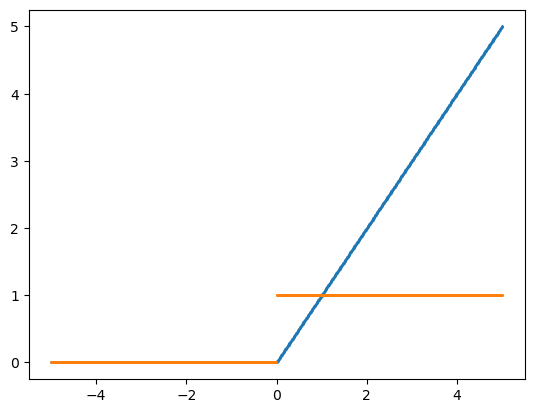

In [214]:
x = np.linspace(-5,5,1000)
plt.scatter(x, relu(x), s=1);
plt.scatter(x, drelu(x), s=1);

In [92]:
class Perceptron:
    """ Simple perceptron for regression. Most things are hardcoded """
    
    def __init__(self):
        # initialize weights
        self.w1, self.w2 = np.random.randn(2)
    
    def eval(self, x1, x2):
        return self._forward_pass(x1, x2)
    
    # fpass for a single point
    def _forward_pass(self, x1, x2, actf=sigm):
        return actf(self.w1 * x1 + self.w2 * x2)

    # derivative of the forward pass
    def _df(self, x1, x2, actf=dsigm):
        return actf(self.w1 * x1 + self.w2 * x2)

    # simple square error
    def loss(self, x1, x2, y_true):
        return np.sum((self._forward_pass(x1, x2) - y_true)**2) 

    # learn over the set (X1,X2, y)
    # iterate over the set and update weights for every forward pass, scaling gradient by lrate
    def learn(self, X1, X2, Y, lrate=0.01):
        for x1, x2, y in zip(X1, X2, Y):
            fpass = self._forward_pass(x1, x2)
            gradient = 2 * (fpass - y) * self._df(x1, x2)
            gradient_w1 = gradient * x1
            gradient_w2 = gradient * x2
            # update weights...
            self.w1 -= lrate * gradient_w1
            self.w2 -= lrate * gradient_w2

Loss before training: 102.57708685456711


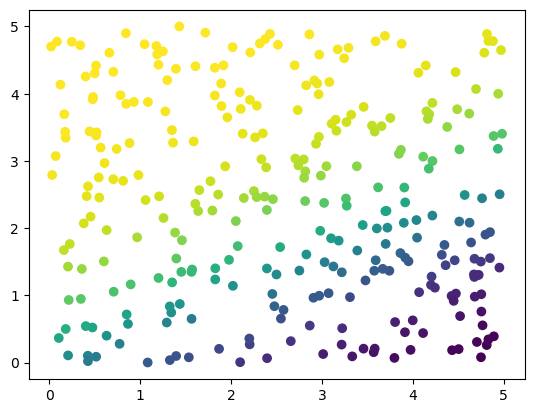

In [201]:
perceptron = Perceptron()

print(f"Loss before training: {perceptron.loss(x1, x2, y)}")
y_pred = perceptron.eval(x1, x2)
plt.scatter(x1, x2, c=y_pred)

Loss now: 9.684829944535108


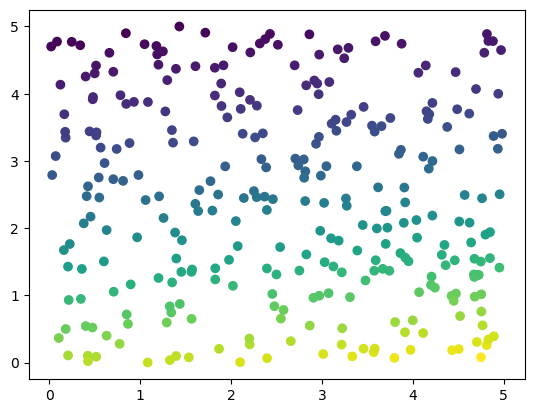

In [203]:
iters = 100
for i in range(iters):
    perceptron.learn(x1, x2, y)
y_pred = perceptron.eval(x1, x2)
plt.scatter(x1, x2, c=y_pred)
print(f"Loss now: {perceptron.loss(x1, x2, y)}")

In [206]:
perceptron.w2

-0.41212617932729395

### Somethings happening...

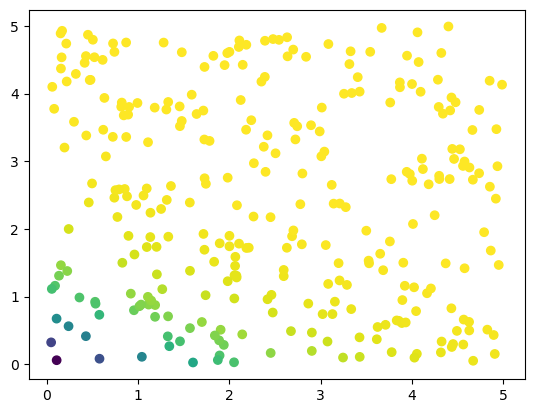

In [153]:
y_pred = perceptron.eval(x1, x2)
plt.scatter(x1, x2, c=y_pred)

In [467]:
class PerceptronRegressor:
    """ Vectorized perceptron for regression. Most things are hardcoded """
    
    def __init__(self, n_inputs, actf, actfd):
        # initialize weights
        self.W = np.random.randn(n_inputs)
        self.actf = actf
        self.actfd = actfd
    
    def eval(self, x):
        return self._forward_pass(x)
    
    # fpass for a single point
    def _forward_pass(self, x):
        return self.actf(np.dot(x, self.W))

    # derivative of the forward pass
    def _df(self, x):
        return self.actfd(np.dot(x, self.W))

    # simple square error
    def loss(self, x, y_true):
        return np.sum((self._forward_pass(x) - y_true)**2) 

    # learn over the set (X1,X2, y)
    # iterate over the set and update weights for every forward pass, scaling gradient by lrate
    def _learn(self, X, Y, lrate=0.01):
        for x, y in zip(X, Y):
            fpass = self._forward_pass(x)
            gradient = 2 * (fpass - y) * self._df(x) * x
#             print(gradient)
            # update weights...
            self.W -= lrate * gradient
        
    def train(self, X, Y, iters=100, lrate=0.01):
        for i in range(iters):
            self._learn(X, Y, lrate)
#             print(f"Step {i}, loss {self.loss(X, Y)}, weights {self.W}")
            

class PerceptronClassifier(PerceptronRegressor):
    def __init__(self, n_inputs):
        super().__init__(n_inputs, sigm, dsigm)
    
    def loss(self, x, y_true):
        y_pred = self._forward_pass(x)
        nll = - y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)
        return np.sum(nll)
    
    def _learn(self, X, Y, lrate=0.01):
        for x, y in zip(X, Y):
            y_pred = self._forward_pass(x)
            nll_gradient = -y/y_pred + (1-y)/(1-y_pred)
            gradient = nll_gradient * self._df(x) * x
            print(gradient)
            self.W -= lrate * gradient

In [278]:
perceptron = PerceptronV(3, relu, drelu)
perceptron.W
X = np.stack([x1, x2, np.ones(x1.shape)], axis=1)
print(perceptron.loss(X, y))

13010.0313486045


# Let's try something simpler - pure linear regression on one x

In [469]:
y = 13.5*x1 + 3.123*x2 + 4.12
X = np.stack([x1, x2, np.ones(x1.shape)],axis=1)

In [320]:
# perc = PerceptronV(3, lambda x: x, lambda x: 1)
perc = PerceptronV(3, relu, drelu)

print(f"Loss before training: {perc.loss(X, y)}")
perc.train(X, y, iters=10)
print(f"Loss after training: {perc.loss(X, y)}")
print(f"Weights after training: {perc.W}")

Loss before training: 551355.7776623863
Step 0, loss 2.190864437386001, weights [13.53007625  3.15739096  3.90213305]
Step 1, loss 0.4865665730641705, weights [13.51417509  3.1392067   4.01732599]
Step 2, loss 0.10806400042682732, weights [13.50668029  3.13063773  4.07161287]
Step 3, loss 0.024000473593819176, weights [13.50314822  3.12659943  4.09719662]
Step 4, loss 0.005330385053788935, weights [13.50148366  3.1246963   4.10925346]
Step 5, loss 0.0011838518398635985, weights [13.5006992   3.12379941  4.11493548]
Step 6, loss 0.0002629275680095266, weights [13.50032951  3.12337674  4.11761325]
Step 7, loss 5.839489680356713e-05, weights [13.50015529  3.12317755  4.1188752 ]
Step 8, loss 1.2969214291964342e-05, weights [13.50007318  3.12308367  4.11946991]
Step 9, loss 2.8803975783867454e-06, weights [13.50003449  3.12303943  4.11975019]
Loss after training: 2.8803975783867454e-06
Weights after training: [13.50003449  3.12303943  4.11975019]


## ReLU works if coeffs are non-negative

# Works :) good

# Classification + sigmoid act.

## Simplest possible case

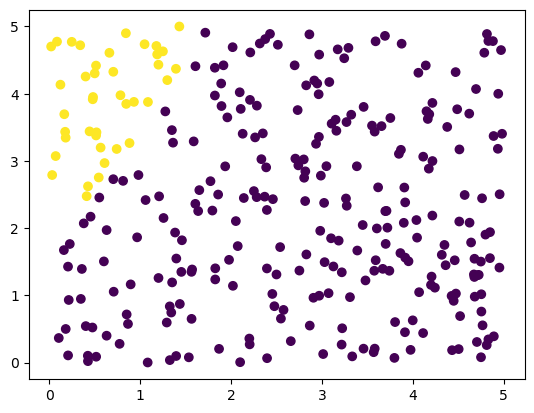

In [470]:
# y_c = ((x1 < 2.5).astype(float) != (x2 < 2.5)).astype(float)
# y_c = (x1 < 2 + x2 < 2).astype(float)
y_c = (x1 < 0.5*x2 - 0.75).astype(float)
plt.scatter(x1,x2, c=y_c);

In [471]:
perc = PerceptronClassifier(3)

print(f"Loss before training: {perc.loss(X, y_c)}")
perc.train(X, y_c, iters=200)
print(f"Loss after training: {perc.loss(X, y_c)}")
print(f"Weights after training: {perc.W}")

Loss before training: 685.7081988377778
[3.42975091 3.77131378 0.99150764]
[3.16550926 4.64743355 0.9974236 ]
[-0.00105364 -0.00909703 -0.00211451]
[0.10723897 0.29971518 0.59868605]
[0.20401369 1.60766065 0.91110979]
[-0.00198034 -0.01628346 -0.0041568 ]
[0.66825445 0.30861018 0.51743403]
[3.57601645 4.75964189 0.99588637]
[1.27560229 0.26728475 0.27242775]
[2.20745419 0.93093407 0.57128781]
[2.67563791 3.67793656 0.97910597]
[0.3468637  1.90192768 0.91818169]
[1.58935819 0.52791401 0.36437837]
[0.75432894 0.4584331  0.52549666]
[0.97447739 2.2262353  0.92058041]
[1.49363962 2.32286163 0.90526494]
[0.47768752 0.05517807 0.12204066]
[2.00082228 4.65455666 0.99204599]
[2.30825531 1.72619723 0.70704712]
[3.71886991 3.40724433 0.88204127]
[1.01323578 0.5314401  0.40536918]
[1.69894861 4.85876007 0.99002332]
[0.35746627 0.03917405 0.19143496]
[3.68289666 3.92916049 0.88889408]
[0.12732126 1.34131632 0.8013291 ]
[1.76166789 3.54921172 0.92998212]
[2.74372704 2.4713633  0.66094596]
[0.205195

[0.00062343 0.00028055 0.00013479]
[0.00096367 0.00052563 0.0002108 ]
[4.21145170e-04 4.49997918e-05 1.02371792e-04]
[0.0059858  0.00483141 0.00155577]
[-0.03596533 -0.50113145 -0.10615482]
[0.06474766 0.07880869 0.02713659]
[0.09642428 0.26419726 0.2788518 ]
[0.01106346 0.00179931 0.00502724]
[0.00421559 0.00207394 0.00124379]
[1.88761088e-04 7.88563796e-06 4.25822513e-05]
[0.06795094 0.09569002 0.02304871]
[0.0267269  0.02917536 0.00846032]
[0.09276869 0.09726657 0.07726545]
[0.50971093 1.3980338  0.31710952]
[0.06987284 0.30666113 0.32907959]
[0.11928612 0.16685067 0.0862395 ]
[0.10883741 0.14985499 0.06647088]
[-0.85363441 -2.6787879  -0.61292453]
[0.02912635 0.10388347 0.28362257]
[-0.00513885 -0.29506443 -0.06179709]
[9.69619578e-03 3.00080572e-05 4.61858376e-03]
[0.00499157 0.00060016 0.00187849]
[2.77799723e-04 7.66920229e-05 5.89623559e-05]
[9.75915686e-05 5.29176065e-06 2.02716842e-05]
[0.00436838 0.00182346 0.00135719]
[0.00789482 0.00202904 0.00309793]
[0.07598109 0.0505814

[0.00347454 0.00333435 0.00097039]
[-0.00691283 -0.23644488 -0.0571905 ]
[0.01911928 0.01468859 0.01047241]
[-0.01585424 -0.35865523 -0.09707419]
[0.33935052 0.87048275 0.25170776]
[-0.00507114 -0.47228559 -0.16926008]
[-0.19266956 -1.09356926 -0.34191779]
[0.00412929 0.00324454 0.00136553]
[9.70694931e-06 1.12905301e-06 2.03561903e-06]
[0.00044493 0.00018864 0.00012387]
[0.00598295 0.00404753 0.00235565]
[0.21196679 0.43922399 0.1334725 ]
[0.0132638  0.01501204 0.00447084]
[0.04114324 0.06003324 0.01455568]
[0.00059397 0.00049866 0.00013231]
[1.48386553e-04 1.02283429e-04 3.03451808e-05]
[0.21600785 0.43765405 0.09093508]
[-0.39538102 -1.58181204 -0.33584501]
[0.0139716  0.01508213 0.00498974]
[0.01245154 0.01424433 0.0040077 ]
[0.08590889 0.13077054 0.04845663]
[0.00095711 0.00097127 0.00019871]
[0.00872175 0.00954221 0.0026667 ]
[0.0011755  0.00053779 0.000376  ]
[1.73434789e-02 3.46477461e-05 1.60371766e-02]
[8.65083865e-05 2.22650143e-05 2.12552755e-05]
[-0.47751898 -1.76994889 -0

[0.0140628  0.00649442 0.01088892]
[0.01149065 0.01529394 0.00320004]
[4.24353079e-06 8.89172973e-07 9.06282122e-07]
[8.95781494e-05 3.77771603e-05 2.31827711e-05]
[0.02782893 0.03825369 0.01018354]
[0.19774904 1.08430017 0.52346079]
[1.80483810e-05 5.99486835e-06 4.13779580e-06]
[0.01447277 0.00879563 0.01008233]
[0.19711361 0.45031447 0.18621153]
[0.07610848 0.11836153 0.04612782]
[1.61452735e-05 1.86495372e-06 4.12482999e-06]
[0.41330633 0.96148357 0.20492519]
[0.0011385  0.00085141 0.00034874]
[0.00056141 0.00051436 0.00013315]
[0.00192038 0.00100724 0.0007683 ]
[0.75034132 2.14587328 0.43724419]
[0.00215865 0.00023656 0.00115603]
[0.00122701 0.00130906 0.00029615]
[0.08403499 0.88529997 0.52889585]
[0.16975393 0.34200126 0.08961287]
[0.00047707 0.00042971 0.00011492]
[1.07268188e-04 4.53979405e-06 3.55958772e-05]
[0.13578152 0.26064702 0.0648171 ]
[8.12912350e-06 3.22451776e-06 1.69344062e-06]
[0.02197498 0.03162706 0.00753637]
[-0.46400455 -1.71371365 -0.38671662]
[1.33308228e-05

[0.00070932 0.00040349 0.00025077]
[1.54227692e-04 5.18360372e-05 5.01851946e-05]
[0.00085662 0.00035657 0.0003491 ]
[0.02015389 0.00105092 0.047552  ]
[-0.00011553 -0.02920177 -0.00621069]
[-0.00494797 -0.22182538 -0.07219696]
[2.24865755e-06 6.31168739e-07 4.81180050e-07]
[9.50253330e-05 6.56398099e-05 2.27505577e-05]
[3.09775671e-06 1.02279284e-06 6.61961349e-07]
[6.38981683e-05 2.24526495e-05 1.83644331e-05]
[2.44314588e-06 5.04352640e-07 5.48938788e-07]
[0.00331513 0.00187505 0.00164112]
[1.88635218e-05 1.28851405e-05 3.78549917e-06]
[-0.01031282 -0.20501043 -0.05970731]
[0.00098064 0.0009506  0.00026126]
[1.55575140e-05 9.34505011e-07 4.49905906e-06]
[0.06523715 0.10439742 0.0306652 ]
[0.09278658 0.15891778 0.07387229]
[1.28317948e-04 1.02717235e-04 2.93006656e-05]
[0.3608346  1.40059465 0.51331439]
[1.99965371e-06 5.44622920e-07 4.27447167e-07]
[0.01054163 0.0113725  0.00462028]
[1.44574117e-05 9.31419049e-06 2.92843870e-06]
[8.38579871e-06 4.30401816e-06 1.76064157e-06]
[1.8322

[0.03208171 0.04487408 0.02319391]
[0.02582855 0.03556256 0.01577442]
[-0.75637996 -2.37359396 -0.54309412]
[0.01596395 0.05693782 0.15545159]
[-0.00055946 -0.03212345 -0.0067278 ]
[2.56034873e-04 7.92383867e-07 1.21956954e-04]
[7.80962989e-05 9.38988433e-06 2.93901236e-05]
[5.67009538e-07 1.56534024e-07 1.20346478e-07]
[8.57272233e-08 4.64843381e-09 1.78072268e-08]
[6.55435318e-05 2.73593289e-05 2.03634407e-05]
[1.79378818e-04 4.61020743e-05 7.03883878e-05]
[0.01608607 0.01070867 0.0186063 ]
[0.00369506 0.00308967 0.00178254]
[0.19706703 0.4298575  0.10819326]
[0.01688943 0.0040949  0.03996225]
[9.32062780e-07 3.72934709e-07 1.92154513e-07]
[0.06214268 0.10999663 0.02814656]
[2.89283095e-04 9.80173098e-05 1.16807067e-04]
[8.32959036e-06 3.17659880e-06 2.10708500e-06]
[0.00047979 0.00046043 0.000134  ]
[-0.00244401 -0.08359457 -0.02021958]
[0.00451979 0.00347238 0.00247567]
[-0.0071667  -0.16212538 -0.04388111]
[0.29064002 0.74553334 0.21557753]
[-0.00309292 -0.28805017 -0.10323287]
[-

[0.00108107 0.0010062  0.00036178]
[7.91397024e-06 3.15587268e-06 2.02045625e-06]
[0.24460185 0.53707014 0.129365  ]
[4.82415332e-08 8.12380579e-10 1.01531485e-08]
[0.0004074  0.00039199 0.00011143]
[0.01344887 0.00229603 0.02615627]
[-0.57940753 -1.87661306 -0.44658658]
[0.00030888 0.00020315 0.0001036 ]
[2.74384288e-06 1.10437899e-06 6.30903498e-07]
[-0.03924876 -0.22848183 -0.04663348]
[4.57079834e-05 8.78481308e-06 1.59483670e-05]
[0.01144799 0.00414073 0.01482164]
[0.35484943 0.81912901 0.18522534]
[5.53935898e-07 1.27139368e-07 1.23780983e-07]
[0.0026816  0.00111562 0.00171385]
[1.75187056e-05 6.69428500e-06 4.89867046e-06]
[1.06824650e-06 1.97863313e-08 2.81261129e-07]
[4.71763675e-05 3.51175865e-05 1.14639924e-05]
[1.73275726e-04 1.03366668e-04 5.58853941e-05]
[0.10606477 0.19939684 0.04217631]
[8.24641081e-06 4.27881348e-06 1.95607910e-06]
[3.76298402e-07 1.20599871e-07 7.75887139e-08]
[4.72211499e-05 2.87265296e-05 1.27252338e-05]
[4.89103007e-05 2.98000949e-05 1.32275004e-05

[-0.25075563 -1.04561931 -0.26960153]
[6.03442363e-06 5.03064849e-07 1.87588991e-06]
[-0.01591811 -0.13715064 -0.03104238]
[0.0898414  0.16732474 0.04587263]
[8.06421992e-07 2.11822572e-07 1.90023361e-07]
[0.00083031 0.00077281 0.00027787]
[5.07457348e-06 2.02359970e-06 1.29555121e-06]
[0.23309326 0.51180082 0.12327833]
[2.56975456e-08 4.32743025e-10 5.40843086e-09]
[3.04152851e-04 2.92643832e-04 8.31892075e-05]
[0.01159868 0.00198016 0.02255789]
[-0.57419104 -1.85971766 -0.4425659 ]
[2.25737579e-04 1.48467155e-04 7.57165140e-05]
[1.69633905e-06 6.82765485e-07 3.90046475e-07]
[-0.03532621 -0.20564718 -0.04197289]
[3.09952409e-05 5.95710809e-06 1.08148171e-05]
[0.00968944 0.00350467 0.01254487]
[0.34297143 0.79171002 0.17902523]
[3.22967919e-07 7.41275973e-08 7.21695175e-08]
[0.0021208  0.00088231 0.00135543]
[1.15440621e-05 4.41124153e-06 3.22800995e-06]
[6.33407289e-07 1.17321297e-08 1.66771292e-07]
[3.25099367e-05 2.42000513e-05 7.90000770e-06]
[1.24140452e-04 7.40552946e-05 4.003814

[4.62436761e-06 3.74240970e-06 9.35861485e-07]
[1.07629405e-05 7.65326890e-06 2.55239422e-06]
[4.44937063e-05 3.20559492e-05 1.22960797e-05]
[0.00180116 0.00139275 0.00091094]
[0.01319147 0.01914508 0.00561486]
[3.09889974e-05 1.02847415e-05 1.06618300e-05]
[7.52864468e-07 1.19334295e-07 1.97842082e-07]
[8.16491258e-07 3.79833638e-07 1.80959121e-07]
[3.49302385e-08 5.57932381e-09 7.34511288e-09]
[3.75477617e-05 3.26701897e-05 9.01395968e-06]
[9.18391906e-05 6.54663608e-05 2.80590986e-05]
[0.00141354 0.00156749 0.00048159]
[0.00036706 0.00021474 0.00015331]
[0.00078537 0.00087162 0.00023638]
[-0.12408732 -0.6312425  -0.15870972]
[4.87206560e-06 7.72523872e-07 1.51163071e-06]
[0.02479904 0.03226861 0.02772942]
[1.80390218e-04 1.91474496e-04 4.44104185e-05]
[0.00701077 0.00651613 0.00482836]
[0.46072732 1.34946736 0.36115332]
[0.00089855 0.00088103 0.00032042]
[2.13949351e-05 2.05982344e-05 4.46881168e-06]
[0.0036801  0.00377504 0.0017932 ]
[5.71232437e-07 1.73752137e-07 1.35774922e-07]
[

[6.14470047e-05 1.90167904e-07 2.92690189e-05]
[1.56200310e-05 1.87806960e-06 5.87831497e-06]
[5.53724444e-08 1.52866415e-08 1.17526747e-08]
[6.03097890e-09 3.27021046e-10 1.25275269e-09]
[1.31998485e-05 5.50991054e-06 4.10100469e-06]
[4.13503520e-05 1.06274365e-05 1.62259103e-05]
[0.00818155 0.00544655 0.00946337]
[0.0014293  0.00119513 0.00068951]
[0.16017872 0.34939394 0.08794094]
[0.00943163 0.00228673 0.02231628]
[1.01631953e-07 4.06647316e-08 2.09524925e-08]
[0.04094964 0.07248356 0.0185475 ]
[7.27646523e-05 2.46547261e-05 2.93809966e-05]
[1.24156466e-06 4.73487006e-07 3.14070939e-07]
[1.43653284e-04 1.37857071e-04 4.01202360e-05]
[-0.00131365 -0.04493171 -0.01086793]
[0.00180586 0.00138737 0.00098914]
[-0.00446579 -0.10102528 -0.02734366]
[0.25994586 0.66679841 0.19281063]
[-0.00233106 -0.21709577 -0.07780387]
[-0.1374789  -0.78031371 -0.24397461]
[1.62586346e-04 1.27750232e-04 5.37662678e-05]
[1.18041329e-08 1.37298458e-09 2.47541392e-09]
[4.71819210e-06 2.00045553e-06 1.313542

[-0.55789822 -1.80694767 -0.43000798]
[8.22273705e-05 5.40807774e-05 2.75805644e-05]
[3.62126710e-07 1.45753656e-07 8.32653393e-08]
[-0.02512497 -0.14626193 -0.02985228]
[8.84372199e-06 1.69971281e-06 3.08573938e-06]
[0.00558785 0.00202112 0.00723456]
[0.30734558 0.70947184 0.16042915]
[5.70257377e-08 1.30885474e-08 1.27428136e-08]
[0.00098809 0.00041107 0.00063151]
[3.01564479e-06 1.15234460e-06 8.43250092e-07]
[1.17540600e-07 2.17711666e-09 3.09475405e-08]
[9.86382042e-06 7.34252307e-06 2.39693660e-06]
[4.24239755e-05 2.53077861e-05 1.36827047e-05]
[0.07426431 0.13961346 0.02953096]
[1.30786884e-06 6.78613635e-07 3.10231318e-07]
[3.74166820e-08 1.19916721e-08 7.71492045e-09]
[9.68103714e-06 5.88936526e-06 2.60886195e-06]
[1.00778234e-05 6.14022180e-06 2.72548751e-06]
[1.25953444e-07 4.84902578e-08 2.71320608e-08]
[0.00117365 0.00111326 0.00049026]
[0.00117955 0.00126288 0.00043043]
[0.05241519 0.09392661 0.02488901]
[0.00184474 0.00192177 0.00077856]
[1.47512226e-07 7.45314228e-08 2.

[1.48374293e-05 1.31112568e-05 3.54818863e-06]
[1.19240353e-04 1.18366726e-04 3.35759211e-05]
[1.24717292e-05 3.43123614e-07 5.20537170e-06]
[4.16799855e-08 1.98821363e-09 1.04829261e-08]
[3.99352788e-05 1.98664765e-05 1.45118329e-05]
[0.02093675 0.03571978 0.00731564]
[0.00285874 0.00406573 0.00086842]
[1.52293854e-06 1.06993198e-06 3.37390855e-07]
[1.40643500e-06 1.13820017e-06 2.84628832e-07]
[3.44088778e-06 2.44673278e-06 8.15994669e-07]
[1.60947278e-05 1.15956125e-05 4.44786628e-06]
[0.000914   0.00070675 0.00046226]
[0.00846591 0.01228677 0.00360346]
[1.03942109e-05 3.44966864e-06 3.57615021e-06]
[1.75236443e-07 2.77762045e-08 4.60496466e-08]
[1.99781788e-07 9.29389537e-08 4.42776776e-08]
[6.11892117e-09 9.77360708e-10 1.28668365e-09]
[1.37528209e-05 1.19662864e-05 3.30159157e-06]
[3.53695705e-05 2.52127338e-05 1.08062611e-05]
[0.00072495 0.0008039  0.00024699]
[1.58392154e-04 9.26645907e-05 6.61557813e-05]
[0.00038465 0.00042689 0.00011577]
[-0.10641272 -0.54133035 -0.13610362]


[1.23659141e-09 8.84727858e-11 2.55872849e-10]
[0.00282583 0.00394182 0.0008707 ]
[0.00699495 0.00882051 0.00389957]
[4.17029181e-04 1.17906390e-05 3.14635123e-04]
[-0.00535135 -0.05721844 -0.01344515]
[0.00164077 0.00091162 0.0012234 ]
[0.00267466 0.00235979 0.00170293]
[0.01566338 0.02363183 0.00809458]
[6.53956697e-09 1.86562831e-09 1.32002151e-09]
[1.60657397e-05 1.31416716e-05 4.15173080e-06]
[1.88743454e-09 1.23122798e-10 4.01050000e-10]
[-0.03437587 -0.2676992  -0.07782859]
[0.00769443 0.00402534 0.03752084]
[6.57218621e-05 5.67173114e-05 1.94192264e-05]
[1.07032734e-09 8.55890065e-11 2.18761851e-10]
[0.01349917 0.01490304 0.02853108]
[3.77751668e-04 4.62121781e-04 9.74225900e-05]
[-0.00581119 -0.10896824 -0.03256708]
[4.33797464e-06 2.40188568e-06 1.20349494e-06]
[-0.01617087 -0.1331305  -0.0336973 ]
[0.29931337 0.99812112 0.36920949]
[9.81525269e-07 5.15201639e-07 2.42944264e-07]
[0.13841986 0.28370965 0.05977107]
[3.29850457e-09 1.47316855e-10 7.32100946e-10]
[6.30202217e-09 

[0.01411554 0.02075703 0.00878865]
[0.0062958  0.00400679 0.01000584]
[-0.0737614  -0.33356144 -0.07043171]
[0.00210706 0.00285406 0.00068384]
[2.17605195e-04 2.39276114e-04 6.29075459e-05]
[0.00399171 0.00586042 0.00125775]
[-0.00851783 -0.07354245 -0.01709417]
[0.01416828 0.03959799 0.07909763]
[0.11033282 0.86944031 0.49273805]
[-0.01679331 -0.13808366 -0.03524962]
[0.00113497 0.00052415 0.00087882]
[0.00092897 0.00123644 0.00025871]
[4.41546697e-09 9.25199814e-10 9.43002178e-10]
[4.64440009e-07 1.95865005e-07 1.20196794e-07]
[0.00338611 0.00465456 0.00123909]
[0.18199314 0.99790724 0.48175342]
[4.15425612e-08 1.37985887e-08 9.52410278e-09]
[0.00118343 0.00071921 0.00082443]
[0.09584978 0.21897292 0.09054846]
[0.01727456 0.02686486 0.01046976]
[3.26066290e-08 3.76641832e-09 8.33041330e-09]
[0.29563971 0.68775312 0.14658383]
[2.54501320e-05 1.90325339e-05 7.79568991e-06]
[1.01125475e-05 9.26515879e-06 2.39849322e-06]
[5.15751993e-05 2.70510870e-05 2.06338905e-05]
[0.82874652 2.370101

[0.44168885 1.29370381 0.34622952]
[2.13470453e-04 2.09308554e-04 7.61226328e-05]
[2.80268243e-06 2.69831665e-06 5.85403038e-07]
[0.00112226 0.00115121 0.00054684]
[3.10392904e-08 9.44124090e-09 7.37765745e-09]
[2.46028117e-09 3.76604642e-10 5.44162473e-10]
[0.00162412 0.00185825 0.00075895]
[1.35627646e-05 1.67075332e-06 6.15242476e-06]
[-0.01396857 -0.09751955 -0.02116152]
[0.05627133 0.11528975 0.04661078]
[2.45817228e-08 6.76403436e-09 5.85171493e-09]
[9.90590550e-05 8.45572010e-05 3.51862104e-05]
[0.15709581 0.37777571 0.11546981]
[3.67377954e-09 1.01466086e-09 7.77291404e-10]
[0.00044138 0.00029922 0.00024182]
[4.16967640e-08 1.81150519e-09 1.16813618e-08]
[5.02262779e-09 1.58935114e-09 1.05746501e-09]
[2.81434926e-08 1.26646032e-08 6.08459948e-09]
[8.30632002e-08 4.53071057e-08 1.81701472e-08]
[7.87486326e-09 8.41437187e-10 1.91421846e-09]
[6.06370816e-06 4.89429451e-06 1.57601748e-06]
[-0.0014305  -0.0199322  -0.00422224]
[0.00155474 0.00189238 0.00065161]
[0.02856831 0.0782756

[9.60038881e-05 4.93130599e-06 6.25622319e-05]
[2.69008528e-06 2.66327581e-06 5.56670595e-07]
[6.50232771e-07 5.21015526e-07 1.40688037e-07]
[0.08142942 0.16396923 0.03353648]
[9.37111709e-05 8.97994068e-05 3.07328278e-05]
[1.80027457e-07 6.57149573e-08 4.81033447e-08]
[4.24996035e-07 2.26530417e-07 1.08936967e-07]
[1.27965514e-06 8.52964191e-07 3.27516349e-07]
[4.14458439e-06 3.66240736e-06 9.91126355e-07]
[4.16523798e-05 4.13472092e-05 1.17285548e-05]
[3.02028166e-06 8.30943279e-08 1.26058611e-06]
[5.34987999e-09 2.55199328e-10 1.34554741e-09]
[1.14787955e-05 5.71031999e-06 4.17120818e-06]
[0.01369716 0.02336847 0.00478601]
[0.00148319 0.00210941 0.00045056]
[3.25339039e-07 2.28565128e-07 7.20754081e-08]
[3.07818558e-07 2.49111501e-07 6.22951194e-08]
[7.98243767e-07 5.67612000e-07 1.89300756e-07]
[4.36113723e-06 3.14202626e-06 1.20522419e-06]
[0.00037894 0.00029302 0.00019165]
[0.00477886 0.00693567 0.00203409]
[2.53527914e-06 8.41417691e-07 8.72268142e-07]
[2.67794148e-08 4.24472496

[0.01258731 0.02061738 0.00466255]
[0.27803691 1.24377573 0.50653083]
[0.13069163 0.27266771 0.05909884]
[2.33101282e-06 1.38335956e-06 6.75867071e-07]
[0.0656643  0.45862201 0.32116008]
[3.15208724e-09 7.06365544e-10 7.11922093e-10]
[-0.36023885 -1.28786933 -0.33219691]
[0.0009972  0.00062982 0.00075277]
[0.00543646 0.00678382 0.00372714]
[0.01769772 0.02962168 0.00775019]
[1.24890472e-05 7.10418506e-06 4.41535191e-06]
[1.21131076e-06 4.07122410e-07 3.94156623e-07]
[1.60119354e-05 6.66492083e-06 6.52529507e-06]
[0.00311419 0.00016239 0.00734776]
[-1.04279725e-05 -2.63574684e-03 -5.60576136e-04]
[-0.00184345 -0.08264457 -0.02689812]
[2.29310691e-09 6.43645092e-10 4.90691567e-10]
[6.87202272e-07 4.74692643e-07 1.64527021e-07]
[3.77185282e-09 1.24536057e-09 8.06009319e-10]
[3.28301997e-07 1.15359327e-07 9.43545053e-08]
[2.49356335e-09 5.14760607e-10 5.60266848e-10]
[1.26044680e-04 7.12913419e-05 6.23970939e-05]
[6.60229898e-08 4.50984452e-08 1.32493803e-08]
[-0.00333343 -0.06626584 -0.01

[0.02050735 0.03629936 0.00928849]
[7.37229740e-06 2.49794326e-06 2.97679489e-06]
[5.48050579e-08 2.09006294e-08 1.38636968e-08]
[2.01419525e-05 1.93292523e-05 5.62534921e-06]
[-0.00048486 -0.01658401 -0.00401128]
[0.00038875 0.00029866 0.00021293]
[-0.00209513 -0.04739623 -0.01282834]
[0.2122473  0.54444477 0.157431  ]
[-0.00150309 -0.1399853  -0.05016864]
[-0.11400156 -0.64705917 -0.20231096]
[2.15717245e-05 1.69497185e-05 7.13363171e-06]
[1.81307292e-10 2.10885558e-11 3.80214794e-11]
[2.76007483e-07 1.17023785e-07 7.68403701e-08]
[3.97653423e-05 2.69016749e-05 1.56566655e-05]
[0.06494368 0.13457213 0.04089412]
[2.42528700e-04 2.74495237e-04 8.17493944e-05]
[0.00242567 0.00353936 0.00085815]
[7.79116883e-07 6.54090465e-07 1.73557310e-07]
[5.45694491e-08 3.76149339e-08 1.11595004e-08]
[0.07396565 0.14986199 0.03113809]
[-0.15484444 -0.61949051 -0.13152814]
[2.39946652e-04 2.59018607e-04 8.56932649e-05]
[2.09067197e-04 2.39168957e-04 6.72911177e-05]
[0.00865091 0.01316842 0.00487952]
[

[2.41032747e-06 1.94548488e-06 6.26467852e-07]
[-0.00093083 -0.01296988 -0.00274741]
[0.00092821 0.00112979 0.00038903]
[0.02267601 0.06213102 0.06557731]
[6.52692625e-06 1.06150711e-06 2.96584097e-06]
[7.13906829e-07 3.51220661e-07 2.10634181e-07]
[2.40966294e-10 1.00665501e-11 5.43591233e-11]
[0.00135099 0.00190249 0.00045825]
[1.09629460e-04 1.19672653e-04 3.47028755e-05]
[0.00301944 0.00316583 0.00251484]
[0.50159198 1.37576517 0.31205843]
[0.02355037 0.10335893 0.11091498]
[0.00648511 0.00907101 0.0046885 ]
[0.00474716 0.00653622 0.00289926]
[-0.67632698 -2.12237992 -0.48561467]
[0.00576924 0.02057686 0.05617894]
[-5.92272934e-05 -3.40073827e-03 -7.12236801e-04]
[4.55283747e-06 1.40902484e-08 2.16865064e-06]
[8.45404378e-07 1.01646934e-07 3.18152583e-07]
[8.66537523e-10 2.39224557e-10 1.83920608e-10]
[5.19095866e-11 2.81472172e-12 1.07826400e-11]
[7.38279296e-07 3.08174209e-07 2.29372849e-07]
[2.89215623e-06 7.43311850e-07 1.13488435e-06]
[0.00227619 0.00151528 0.0026328 ]
[0.0002

[8.47942309e-05 5.98434260e-06 6.07868184e-05]
[-0.27260162 -1.17062779 -0.3683574 ]
[0.00078012 0.00067364 0.00049888]
[4.60803753e-05 2.36695028e-06 3.00288997e-05]
[1.11302678e-06 1.10193432e-06 2.30323285e-07]
[2.37559781e-07 1.90350809e-07 5.13997766e-08]
[0.06922126 0.13938643 0.02850858]
[4.72838807e-05 4.53101205e-05 1.55068745e-05]
[5.68753208e-08 2.07610514e-08 1.51970883e-08]
[1.44952086e-07 7.72620299e-08 3.71547949e-08]
[4.76832386e-07 3.17836374e-07 1.22041007e-07]
[1.72034750e-06 1.52020390e-06 4.11399934e-07]
[2.01562148e-05 2.00085381e-05 5.67562457e-06]
[1.12727691e-06 3.10137689e-08 4.70495730e-07]
[1.29051108e-09 6.15598032e-11 3.24576223e-10]
[4.83429082e-06 2.40489932e-06 1.75670291e-06]
[0.010232   0.01745662 0.00357523]
[0.0009444  0.00134314 0.00028689]
[1.12137512e-07 7.87815841e-08 2.48428746e-08]
[1.08076154e-07 8.74639043e-08 2.18720305e-08]
[2.91089820e-07 2.06986991e-07 6.90309470e-08]
[1.76819793e-06 1.27391642e-06 4.88651192e-07]
[0.00020537 0.0001588  

[4.55730364e-07 1.53171300e-07 1.48293194e-07]
[7.14322750e-06 2.97334736e-06 2.91105766e-06]
[0.00207856 0.00010839 0.00490424]
[-6.48574476e-06 -1.63931975e-03 -3.48653944e-04]
[-0.00152651 -0.06843577 -0.02227362]
[5.78640399e-10 1.62416786e-10 1.23820640e-10]
[2.57771723e-07 1.78058696e-07 6.17146004e-08]
[9.87194376e-10 3.25944041e-10 2.10954113e-10]
[1.13791113e-07 3.99841193e-08 3.27037432e-08]
[6.27577974e-10 1.29554526e-10 1.41007500e-10]
[6.47076910e-05 3.65989119e-05 3.20328624e-05]
[2.15494197e-08 1.47198018e-08 4.32450055e-09]
[-0.00267687 -0.05321394 -0.01549805]
[1.11844345e-05 1.08418269e-05 2.97979976e-06]
[1.08026398e-08 6.48890368e-10 3.12400261e-09]
[0.00956044 0.01529933 0.00449395]
[0.01849998 0.03168536 0.01472881]
[4.52841433e-07 3.62495039e-07 1.03403737e-07]
[0.32948925 1.27892633 0.46872326]
[4.97452449e-10 1.35485462e-10 1.06335732e-10]
[0.00047633 0.00051387 0.00020877]
[1.46273299e-08 9.42366032e-09 2.96285669e-09]
[5.59624404e-09 2.87227690e-09 1.17496022

[7.80413082e-05 7.88242307e-05 2.77022440e-05]
[-0.13809876 -0.62868653 -0.16337149]
[0.17272492 0.49179055 0.17625339]
[6.01841638e-05 4.24749009e-06 4.31444899e-05]
[-0.27025854 -1.16056595 -0.36519127]
[0.0006013  0.00051923 0.00038453]
[3.20025280e-05 1.64383194e-06 2.08548802e-05]
[7.19449005e-07 7.12278953e-07 1.48878590e-07]
[1.44340155e-07 1.15656216e-07 3.12302516e-08]
[0.06386193 0.1285947  0.02630136]
[3.36907211e-05 3.22843770e-05 1.10489616e-05]
[3.21334259e-08 1.17295814e-08 8.58605287e-09]
[8.50751483e-08 4.53465614e-08 2.18068590e-08]
[2.92430611e-07 1.94921922e-07 7.48450134e-08]
[1.11327094e-06 9.83754055e-07 2.66225047e-07]
[1.40707438e-05 1.39676530e-05 3.96206629e-06]
[6.91315323e-07 1.90195448e-08 2.88536831e-07]
[6.37810329e-10 3.04247511e-11 1.60415568e-10]
[3.14847758e-06 1.56626316e-06 1.14410571e-06]
[0.00885621 0.01510941 0.0030945 ]
[0.00075533 0.00107424 0.00022945]
[6.61803322e-08 4.64946235e-08 1.46615496e-08]
[6.43855867e-08 5.21059883e-08 1.30301040e-0

[1.75398156e-09 4.82634664e-10 4.17537865e-10]
[2.41794220e-05 2.06396502e-05 8.58863665e-06]
[0.12326373 0.29641811 0.09060229]
[2.04161775e-10 5.63874233e-11 4.31961666e-11]
[1.28316299e-04 8.69881243e-05 7.03017758e-05]
[3.04556545e-09 1.32313807e-10 8.53216133e-10]
[2.94763957e-10 9.32745669e-11 6.20596595e-11]
[2.16560560e-09 9.74524949e-10 4.68202113e-10]
[7.59862128e-09 4.14469388e-09 1.66220501e-09]
[4.63007150e-10 4.94727871e-11 1.12547584e-10]
[1.04073669e-06 8.40025895e-07 2.70497717e-07]
[-0.00062989 -0.00877671 -0.00185917]
[0.00057981 0.00070572 0.00024301]
[0.01825611 0.05002074 0.05279529]
[2.82455877e-06 4.59372313e-07 1.28348196e-06]
[2.76229218e-07 1.35896457e-07 8.14998720e-08]
[5.48329134e-11 2.29068665e-12 1.23696516e-11]
[0.00088798 0.00125047 0.0003012 ]
[6.05659208e-05 6.61143864e-05 1.91719599e-05]
[0.00199709 0.00209392 0.00166334]
[0.49869846 1.36782882 0.31025827]
[0.01975156 0.08668655 0.09302377]
[0.00456456 0.00638464 0.00330001]
[0.00328267 0.00451981 0

[-0.00732351 -0.05112806 -0.01109467]
[0.0345895  0.07086761 0.02865124]
[1.32901836e-09 3.65699585e-10 3.16374756e-10]
[2.08467912e-05 1.77949034e-05 7.40487158e-06]
[0.12009019 0.28878654 0.08826964]
[1.50694222e-10 4.16202244e-11 3.18836017e-11]
[1.12651945e-04 7.63689529e-05 6.17196088e-05]
[2.31290938e-09 1.00483753e-10 6.47962302e-10]
[2.18822627e-10 6.92438314e-11 4.60709574e-11]
[1.65413801e-09 7.44363962e-10 3.57623251e-10]
[5.91059465e-09 3.22395400e-09 1.29294772e-09]
[3.43730971e-10 3.67280054e-11 8.35539804e-11]
[8.64828382e-07 6.98042302e-07 2.24777415e-07]
[-0.000578   -0.00805372 -0.00170602]
[0.00052263 0.00063613 0.00021904]
[0.01739398 0.04765856 0.0503021 ]
[2.34801537e-06 3.81869643e-07 1.06694023e-06]
[2.24044905e-07 1.10223346e-07 6.61031849e-08]
[3.95638176e-11 1.65280856e-12 8.92512561e-12]
[0.00080947 0.00113991 0.00027457]
[5.31366708e-05 5.80045402e-05 1.68202532e-05]
[0.00182274 0.00191112 0.00151813]
[0.49801944 1.36596643 0.30983583]
[0.01898773 0.0833342

[1.12119348e-10 3.09662331e-11 2.37220019e-11]
[9.92358870e-05 6.72739451e-05 5.43692354e-05]
[1.76923317e-09 7.68638801e-11 4.95651239e-10]
[1.63721562e-10 5.18077513e-11 3.44699688e-11]
[1.27242771e-09 5.72593898e-10 2.75097804e-10]
[4.62794081e-09 2.52432609e-09 1.01236607e-09]
[2.57184922e-10 2.74804717e-11 6.25164031e-11]
[7.22140612e-07 5.82872516e-07 1.87691458e-07]
[-0.00053161 -0.00740732 -0.00156909]
[0.00047236 0.00057494 0.00019797]
[0.0165911  0.0454587  0.04798021]
[1.96132686e-06 3.18980530e-07 8.91228630e-07]
[1.82717550e-07 8.98915325e-08 5.39097821e-08]
[2.87923037e-11 1.20282038e-12 6.49520048e-12]
[0.00073966 0.00104161 0.00025089]
[4.67776868e-05 5.10630073e-05 1.48073360e-05]
[0.00166754 0.00174839 0.00138886]
[0.49734128 1.36410637 0.30941392]
[0.01826901 0.08017988 0.08604143]
[0.00391575 0.00547713 0.00283095]
[0.00279465 0.00384787 0.00170679]
[-0.65349881 -2.05074289 -0.46922364]
[0.00404852 0.01443964 0.03942311]
[-3.01655316e-05 -1.73205750e-03 -3.62755082e

[-0.00322476 -0.02778457 -0.0062887 ]
[0.024383   0.04541203 0.01244986]
[6.05954269e-10 1.59165788e-10 1.42785624e-10]
[2.00339428e-05 1.86463593e-05 6.70441184e-06]
[9.52273197e-09 3.79740241e-09 2.43117712e-09]
[0.11549466 0.25359062 0.0610828 ]
[3.44915271e-12 5.80832426e-14 7.25925513e-13]
[5.10433915e-06 4.91119305e-06 1.39609386e-06]
[0.00119204 0.00020351 0.00231835]
[-0.50640794 -1.64017846 -0.39032111]
[2.62793047e-06 1.72838462e-06 8.81455957e-07]
[1.92926513e-09 7.76516724e-10 4.43604162e-10]
[-0.00777408 -0.04525587 -0.00923679]
[1.20329314e-07 2.31266062e-08 4.19851396e-08]
[0.00078301 0.00028322 0.00101376]
[0.21049316 0.48589921 0.10987384]
[1.57872081e-10 3.62348004e-11 3.52776584e-11]
[6.92095598e-05 2.87929485e-05 4.42328920e-05]
[3.12087018e-08 1.19255355e-08 8.72673756e-09]
[3.74038261e-10 6.92803109e-12 9.84814119e-11]
[1.76534300e-07 1.31410257e-07 4.28983404e-08]
[1.09230740e-06 6.51609888e-07 3.52294177e-07]
[0.02986406 0.05614305 0.01187535]
[1.12373866e-08 5.

[9.46677581e-05 9.35640900e-05 3.84795405e-05]
[-0.18269527 -0.63865832 -0.12773409]
[0.00508823 0.00691231 0.01272272]
[0.00138546 0.00153577 0.00099191]
[-0.38136767 -1.41256276 -0.43254041]
[0.00604468 0.00990089 0.00223905]
[0.26399985 1.18098208 0.48095795]
[0.09387767 0.19586112 0.04245154]
[2.85407070e-07 1.69377274e-07 8.27525436e-08]
[0.05440585 0.37998912 0.26609568]
[1.39258995e-10 3.12071806e-11 3.14526685e-11]
[-0.33656434 -1.20323196 -0.31036529]
[0.0002997  0.00018929 0.00022624]
[0.0021772  0.0027168  0.00149265]
[0.00892741 0.01494232 0.0039095 ]
[1.92624074e-06 1.09570974e-06 6.80999168e-07]
[1.28643703e-07 4.32372401e-08 4.18602468e-08]
[2.51238269e-06 1.04577188e-06 1.02386364e-06]
[1.22747387e-03 6.40061892e-05 2.89615676e-03]
[-3.51559187e-06 -8.88591735e-04 -1.88987544e-04]
[-0.00119719 -0.05367202 -0.0174685 ]
[9.75607754e-11 2.73840326e-11 2.08765887e-11]
[7.25773273e-08 5.01335993e-08 1.73761524e-08]
[1.74507910e-10 5.76176433e-11 3.72906920e-11]
[2.88990858e-

[0.00219477 0.00302192 0.00134043]
[-0.64344922 -2.01920632 -0.46200787]
[0.00343804 0.01226227 0.03347845]
[-2.22206141e-05 -1.27587280e-03 -2.67213614e-04]
[7.44155556e-07 2.30303337e-09 3.54463218e-07]
[1.11654647e-07 1.34247619e-08 4.20191983e-08]
[4.92277741e-11 1.35902856e-11 1.04484825e-11]
[1.94684496e-12 1.05564832e-13 4.04397908e-13]
[1.00318913e-07 4.18753470e-08 3.11676557e-08]
[4.56144292e-07 1.17233452e-07 1.78991375e-07]
[0.00092039 0.00061272 0.00106459]
[7.60320916e-05 6.35751810e-05 3.66787353e-05]
[0.08251063 0.17997842 0.04529979]
[0.00135111 0.00032758 0.00319687]
[1.27765898e-10 5.11213826e-11 2.63402792e-11]
[0.01130965 0.02001883 0.00512253]
[1.04219491e-06 3.53125167e-07 4.20818682e-07]
[3.86729047e-09 1.47484207e-09 9.78284571e-10]
[3.80522695e-06 3.65169125e-06 1.06274356e-06]
[-0.00021071 -0.00720702 -0.00174321]
[1.03965272e-04 7.98724192e-05 5.69460209e-05]
[-0.00111348 -0.02518927 -0.00681777]
[0.17603338 0.45155088 0.13056991]
[-0.00104703 -0.09751185 -0

[3.14140495e-09 2.14580527e-09 6.30411754e-10]
[-0.00183692 -0.03651652 -0.01063508]
[3.13357488e-06 3.03758553e-06 8.34858986e-07]
[1.32113543e-09 7.93576456e-11 3.82057592e-10]
[0.00546345 0.00874302 0.00256813]
[0.01129466 0.01934463 0.00899227]
[9.07173017e-08 7.26182929e-08 2.07147742e-08]
[0.3170533  1.23065566 0.45103219]
[4.60112149e-11 1.25315509e-11 9.83538471e-12]
[1.93803853e-04 2.09079052e-04 8.49421478e-05]
[2.05258050e-09 1.32237541e-09 4.15762951e-10]
[6.92649993e-10 3.55503185e-10 1.45425429e-10]
[1.78167846e-09 4.96632731e-11 5.34456552e-10]
[4.33003739e-08 2.33591032e-08 1.16375868e-08]
[-0.17299653 -0.84610505 -0.28506803]
[1.11463969e-04 1.46648681e-04 3.01736197e-05]
[2.62792627e-10 4.13297430e-11 6.57029016e-11]
[5.05531637e-07 1.53792799e-07 1.96155429e-07]
[9.33803305e-08 8.73127913e-08 1.87817761e-08]
[0.18399859 0.88226138 0.40636709]
[0.00381139 0.00560468 0.00237305]
[0.00140468 0.00089397 0.00223244]
[-0.03657822 -0.16541287 -0.03492703]
[0.00036857 0.0004

[2.30114271e-09 8.77571027e-10 5.82105850e-10]
[2.74435649e-06 2.63362546e-06 7.66458149e-07]
[-0.00017915 -0.00612764 -0.00148213]
[8.02826092e-05 6.16779632e-05 4.39740603e-05]
[-0.00098443 -0.02226977 -0.00602757]
[0.16948173 0.43474494 0.12571033]
[-0.0009756  -0.09085955 -0.0325627 ]
[-0.09482512 -0.53821596 -0.1682798 ]
[2.76473263e-06 2.17235483e-06 9.14279448e-07]
[2.61529094e-12 3.04194654e-13 5.48445843e-13]
[1.54102074e-08 6.53373875e-09 4.29019540e-09]
[5.46883402e-06 3.69972409e-06 2.15322438e-06]
[0.03904295 0.0809023  0.0245848 ]
[5.11968519e-05 5.79448617e-05 1.72569747e-05]
[0.00081274 0.00118589 0.00028753]
[6.14640015e-08 5.16007523e-08 1.36918182e-08]
[2.63047291e-09 1.81319523e-09 5.37934026e-10]
[0.0487128  0.09869713 0.02050714]
[-0.1036146  -0.41453387 -0.08801244]
[4.90782232e-05 5.29791641e-05 1.75275344e-05]
[4.30889335e-05 4.92929327e-05 1.38687586e-05]
[0.0033771  0.00514062 0.00190484]
[2.29037718e-07 2.32426047e-07 4.75505445e-08]
[1.99405297e-05 2.181634

[-0.00102294 -0.04586011 -0.01492598]
[3.08446688e-11 8.65769477e-12 6.60031104e-12]
[3.19595096e-08 2.20763881e-08 7.65160871e-09]
[5.68835641e-11 1.87813659e-11 1.21554803e-11]
[1.19090029e-08 4.18460614e-09 3.42266598e-09]
[3.32558188e-11 6.86518972e-12 7.47209121e-12]
[1.56068014e-05 8.82726519e-06 7.72598299e-06]
[1.98877709e-09 1.35847763e-09 3.99104372e-10]
[-0.00167987 -0.03339446 -0.00972581]
[2.31647643e-06 2.24551688e-06 6.17164497e-07]
[8.02639144e-10 4.82127352e-11 2.32114264e-10]
[0.00478258 0.00765345 0.00224809]
[0.01004268 0.01720034 0.00799551]
[6.19274242e-08 4.95722839e-08 1.41407712e-08]
[0.31408973 1.21915247 0.44681629]
[2.61556045e-11 7.12370429e-12 5.59103759e-12]
[1.56545368e-04 1.68883934e-04 6.86121539e-05]
[1.28773624e-09 8.29624340e-10 2.60838988e-10]
[4.21845763e-10 2.16512688e-10 8.85686878e-11]
[1.08965262e-09 3.03734467e-11 3.26867050e-10]
[2.88194414e-08 1.55471246e-08 7.74563174e-09]
[-0.17172504 -0.83988633 -0.28297283]
[9.00800168e-05 1.18514672e-0

[0.00051154 0.00070317 0.00018719]
[0.15887283 0.87113366 0.42055173]
[1.68998328e-10 5.61337179e-11 3.87447811e-11]
[1.09582072e-04 6.65970057e-05 7.63393922e-05]
[0.04452285 0.10171435 0.04206035]
[0.00419429 0.00652283 0.00254208]
[1.12106044e-10 1.29494606e-11 2.86410986e-11]
[0.21931502 0.51019733 0.10874059]
[8.03796190e-07 6.01108012e-07 2.46212706e-07]
[2.81225610e-07 2.57660093e-07 6.67010680e-08]
[1.82072382e-06 9.54965933e-07 7.28424058e-07]
[0.90866143 2.59864709 0.5295016 ]
[2.01433391e-06 2.20747057e-07 1.07874214e-06]
[1.64547163e-06 1.75549919e-06 3.97146627e-07]
[0.06747724 0.71086582 0.42468541]
[0.03299168 0.06646796 0.01741627]
[2.35388611e-07 2.12022102e-07 5.67035824e-08]
[4.71780192e-09 1.99666365e-10 1.56555547e-09]
[0.02122006 0.04073415 0.01012968]
[5.06622437e-11 2.00958080e-11 1.05538440e-11]
[0.00052051 0.00074913 0.00017851]
[-0.22468319 -0.82982514 -0.18725834]
[1.09763120e-10 3.74458033e-11 2.45987296e-11]
[-0.00011131 -0.00216368 -0.00045346]
[1.0431716

[6.79520067e-07 5.08169809e-07 2.08145393e-07]
[2.36268695e-07 2.16470378e-07 5.60381906e-08]
[1.54762210e-06 8.11724637e-07 6.19163191e-07]
[0.91236249 2.60923161 0.5316583 ]
[1.70943141e-06 1.87333366e-07 9.15456806e-07]
[1.41465496e-06 1.50924854e-06 3.41437335e-07]
[0.0669743  0.7055673  0.42151997]
[0.03171832 0.06390252 0.01674406]
[1.97627023e-07 1.78009023e-07 4.76070618e-08]
[3.73390532e-09 1.58025986e-10 1.23905920e-09]
[0.02030466 0.03897694 0.0096927 ]
[3.84170583e-11 1.52386031e-11 8.00295467e-12]
[0.00047741 0.00068711 0.00016373]
[-0.22064324 -0.81490438 -0.18389132]
[8.37407419e-11 2.85682418e-11 1.87669216e-11]
[-0.0001018  -0.00197895 -0.00041475]
[8.35502266e-09 2.45957033e-09 2.52513955e-09]
[0.02263711 0.05686667 0.03776958]
[0.03559287 0.13896257 0.0997297 ]
[5.22402097e-08 1.75052608e-08 1.75910571e-08]
[5.83888797e-05 6.54472100e-05 2.15664668e-05]
[1.95178213e-05 1.97136271e-05 6.92822123e-06]
[-0.11205911 -0.51014253 -0.13256646]
[0.14068599 0.40056778 0.14355

[1.74830841e-05 2.13878976e-05 4.50890752e-06]
[-0.00205823 -0.03859488 -0.01153476]
[2.92458170e-08 1.61930659e-08 8.11373871e-09]
[-0.00532696 -0.04385548 -0.01110047]
[0.22928299 0.76459064 0.28282551]
[3.95707575e-09 2.07706513e-09 9.79443819e-10]
[0.06287976 0.12888031 0.0271521 ]
[1.35539232e-12 6.05341387e-14 3.00828443e-13]
[3.60956146e-12 7.71957893e-13 7.59155447e-13]
[2.04168403e-07 1.97287888e-07 4.56562619e-08]
[0.00130639 0.00201532 0.0004399 ]
[4.13057689e-05 4.08242126e-05 1.67895284e-05]
[-0.15516989 -0.54243626 -0.10848931]
[0.00324651 0.00441035 0.00811764]
[0.00074889 0.00083014 0.00053616]
[-0.38306795 -1.4188605  -0.43446884]
[0.00381524 0.00624918 0.00141323]
[0.25512882 1.14129826 0.46479662]
[0.07604523 0.15865651 0.0343877 ]
[7.67409232e-08 4.55425592e-08 2.22506983e-08]
[0.04799883 0.3352403  0.23475934]
[1.98086298e-11 4.43900582e-12 4.47392479e-12]
[-0.32264694 -1.15347663 -0.29753125]
[1.41266031e-04 8.92225047e-05 1.06639896e-04]
[0.0012268  0.00153085 0.

[1.74517792e-07 5.30917903e-08 6.77160632e-08]
[3.10288207e-08 2.90126725e-08 6.24088992e-09]
[0.17573758 0.84265037 0.38812237]
[0.00249597 0.00367035 0.00155405]
[0.00086511 0.00055057 0.00137491]
[-0.02914562 -0.13180136 -0.02782994]
[2.10331426e-04 2.84898594e-04 6.82620402e-05]
[9.52858942e-06 1.04775249e-05 2.75462254e-06]
[0.00052152 0.00076567 0.00016433]
[-0.00219707 -0.01896942 -0.00440924]
[0.00412986 0.01154228 0.0230559 ]
[0.09247156 0.72869072 0.41297101]
[-0.00578137 -0.04753752 -0.01213525]
[7.27355731e-05 3.35904065e-05 5.63196566e-05]
[7.53839063e-05 1.00335220e-04 2.09936966e-05]
[3.58035818e-12 7.50214358e-13 7.64649715e-13]
[1.97888059e-09 8.34539333e-10 5.12133103e-10]
[0.00039053 0.00053683 0.00014291]
[0.15559879 0.85318136 0.41188501]
[7.71201392e-11 2.56158756e-11 1.76806656e-11]
[7.80480827e-05 4.74326548e-05 5.43715141e-05]
[0.03978815 0.09089774 0.03758753]
[0.00342366 0.00532437 0.00207501]
[4.99413108e-11 5.76876155e-12 1.27591159e-11]
[0.20975078 0.48794

[0.00524731 0.00878273 0.00229791]
[4.55403363e-07 2.59048566e-07 1.61002363e-07]
[2.28212221e-08 7.67022901e-09 7.42595223e-09]
[6.02191668e-07 2.50660504e-07 2.45409329e-07]
[5.97861337e-04 3.11752671e-05 1.41062078e-03]
[-1.52525921e-06 -3.85520497e-04 -8.19933037e-05]
[-0.00085798 -0.03846482 -0.01251905]
[8.54760619e-12 2.39920117e-12 1.82906356e-12]
[1.28029778e-08 8.84379991e-09 3.06523405e-09]
[1.63072604e-11 5.38420242e-12 3.48470751e-12]
[4.43552173e-09 1.55856134e-09 1.27477585e-09]
[9.19492624e-12 1.89816144e-12 2.06596409e-12]
[8.38058068e-06 4.74008776e-06 4.14871839e-06]
[6.99733155e-10 4.77968015e-10 1.40421248e-10]
[-0.00136946 -0.02722383 -0.00792868]
[1.16130904e-06 1.12573519e-06 3.09400389e-07]
[2.57502213e-10 1.54675810e-11 7.44667602e-11]
[0.00352766 0.00564523 0.0016582 ]
[0.00767974 0.01315327 0.00611424]
[2.58797945e-08 2.07165167e-08 5.90950225e-09]
[0.30737502 1.19308904 0.43726411]
[7.20409046e-12 1.96209612e-12 1.53995067e-12]
[9.61491903e-05 1.03727461e-0

[0.002216   0.00790369 0.02157864]
[-9.82765350e-06 -5.64288446e-04 -1.18182278e-04]
[1.63682864e-07 5.06570294e-10 7.79669713e-08]
[2.05340913e-08 2.46891012e-09 7.72763231e-09]
[4.45955616e-12 1.23114732e-12 9.46530599e-13]
[1.24775913e-13 6.76579213e-15 2.59184061e-14]
[1.88624143e-08 7.87359152e-09 5.86028313e-09]
[9.72749856e-08 2.50006030e-08 3.81707800e-08]
[0.00043153 0.00028727 0.00049914]
[2.77242900e-05 2.31820107e-05 1.33745090e-05]
[0.06498201 0.14174367 0.03567627]
[0.00068541 0.00016618 0.00162176]
[1.30175493e-11 5.20855039e-12 2.68370425e-12]
[0.00721586 0.01277255 0.00326831]
[2.42742242e-07 8.22479499e-08 9.80147470e-08]
[5.36146468e-10 2.04466505e-10 1.35625659e-10]
[1.09496794e-06 1.05078748e-06 3.05808339e-07]
[-0.00011377 -0.00389121 -0.00094119]
[3.88964646e-05 2.98826201e-05 2.13051805e-05]
[-0.00069705 -0.0157688  -0.00426801]
[0.15207013 0.3900817  0.11279556]
[-0.0007995  -0.07445881 -0.02668492]
[-0.08708677 -0.49429406 -0.15454708]
[1.07462654e-06 8.443746

[0.0004595  0.00067047 0.00016256]
[1.64571524e-08 1.38162408e-08 3.66602130e-09]
[5.46271487e-10 3.76547065e-10 1.11713000e-10]
[0.03896581 0.07894873 0.01640385]
[-0.08405788 -0.33629274 -0.07140054]
[2.15572984e-05 2.32707619e-05 7.69885833e-06]
[1.89851001e-05 2.17185989e-05 6.11061239e-06]
[0.00207175 0.00315362 0.00116857]
[6.99051452e-08 7.09393052e-08 1.45130145e-08]
[8.27815508e-06 9.05688442e-06 2.53107246e-06]
[3.45861771e-08 1.58231716e-08 1.10629654e-08]
[2.67934524e-05 5.35263279e-08 2.47753827e-05]
[6.11448906e-11 1.57371085e-11 1.50234162e-11]
[-0.15806256 -0.58586709 -0.12653028]
[0.06191639 0.19390152 0.09835248]
[7.16125757e-08 3.53258492e-08 2.36391354e-08]
[-0.12005623 -0.46400214 -0.1012139 ]
[0.00028231 0.00036614 0.00012099]
[-0.00980809 -0.06035749 -0.01395204]
[0.20624056 0.49676987 0.1132617 ]
[7.47703757e-10 3.43413806e-10 1.84738406e-10]
[7.17084314e-09 4.36381983e-09 1.83088982e-09]
[-0.15166967 -0.91658098 -0.37022729]
[1.34339629e-08 1.16409598e-08 2.860

In [404]:
y_pred = perc.eval(X)

[-0.59433361 -0.79611675  1.43517202]


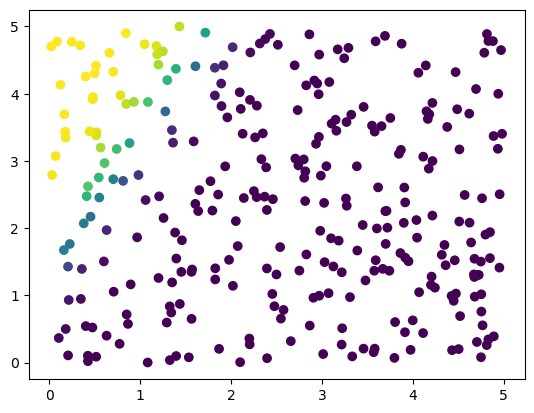

In [405]:
print(perceptron.W)
plt.scatter(X[:,0], X[:,1], c=y_pred);

# Hooray!!!

# Multi-layered version

In [464]:
class MLP:
    _act_f_dict = {
        "SIGMOID": (sigm, dsigm),
        "RELU" : (relu, drelu),
        "NONE": (lambda x: x, lambda x: 1)
    }
    
    def __init__(self, layer_widths, act_f="SIGMOID"):
        self.actf, self.actfd = self._act_f_dict[act_f] # we assume the same act-f for every layer for now
        n_layers = len(layer_widths) - 1
        self.W = [ np.random.randn(layer_widths[i], layer_widths[i+1]) for i in range(n_layers) ]
        
    # input should be of dim (n_cases, l1)
    def _forward_pass(self, X, intermediate=False):
        inter = [X]
        y = X
        for w in self.W:
            y = self.actf(np.matmul(y, w))
            if intermediate:
                inter.append(y)
        if intermediate:
            return y, inter
        else:
            return y
    
    def loss(self, X, y_true):
        y_pred = self._forward_pass(X)
        nll = - y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)
        return np.sum(nll)
    
    def train(self, X, Y, iters=100, lrate=0.01):
        for i in range(iters):
            self._learn(X, Y, lrate)
    
    def _learn(self, X, Y, lrate=0.01):
        for x, y in zip(X, Y):
            y_pred, inter = self._forward_pass(x, intermediate=True)
            
            nll_gradient = -y/y_pred + (1-y)/(1-y_pred)
            d = nll_gradient * self.actfd(x)
            print(d)
            
            W_new = []
            for i in range(len(self.W)-1, -1, -1):
                W_new.append(self.W[i] - lrate*(np.outer(d, inter[i-1])))
                d = np.matmul(d, self.W[i].T) * self._df(x)
            
            self.W = W_new
    

In [465]:
mlp = MLP([4,6,1])


X = np.random.random((10, 4))
Y = np.random.randint(0, 2, 10)

In [466]:
mlp.train(X, Y)

[1.36877716 1.31972076 1.39391228 1.49358641]


ValueError: operands could not be broadcast together with shapes (6,1) (4,4) 